In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [44]:
cvd= pd.read_csv('covid_19_data.csv')
lld= pd.read_csv('COVID19_line_list_data.csv')
oll= pd.read_csv('COVID19_open_line_list.csv')
cnf= pd.read_csv('time_series_covid_19_confirmed.csv')
cnfus= pd.read_csv('time_series_covid_19_confirmed_US.csv')
dth= pd.read_csv('time_series_covid_19_deaths.csv')
dthus= pd.read_csv('time_series_covid_19_deaths_US.csv')
rec= pd.read_csv('time_series_covid_19_recovered.csv')

In [4]:
cvd

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18960,18961,04/26/2020,Wyoming,US,2020-04-27 02:31:20,502.0,7.0,0.0
18961,18962,04/26/2020,Xinjiang,Mainland China,2020-04-27 02:31:20,76.0,3.0,73.0
18962,18963,04/26/2020,Yukon,Canada,2020-04-27 02:31:20,11.0,0.0,0.0
18963,18964,04/26/2020,Yunnan,Mainland China,2020-04-27 02:31:20,185.0,2.0,181.0


In [5]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18965 entries, 0 to 18964
Data columns (total 8 columns):
SNo                18965 non-null int64
ObservationDate    18965 non-null object
Province/State     9326 non-null object
Country/Region     18965 non-null object
Last Update        18965 non-null object
Confirmed          18965 non-null float64
Deaths             18965 non-null float64
Recovered          18965 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [6]:
lld.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
oll

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cnf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26


In [9]:
cnfus.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,136,136,136,136,136,136,139,141,141,141
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,13,14,14,14,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,51,53,53,53,53,54,54,54,55,57


In [10]:
dth.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,30,33,36,36,40,42,43,47,50
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,26,27,27,27,27,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,364,367,375,384,392,402,407,415,419,425
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,35,35,36,37,37,37,37,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [11]:
dthus.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,58,60,62,63,64,63,69,77,83,84
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,2,3,3,3,3,3,3,3,3,4


In [12]:
rec.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,99,112,131,135,150,166,179,188,188,207
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,283,302,314,327,345,356,385,394,403,410
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,846,894,1047,1099,1152,1204,1355,1408,1479,1508
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,191,205,235,248,282,309,333,344,344,344
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6


In [13]:
cvd

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18960,18961,04/26/2020,Wyoming,US,2020-04-27 02:31:20,502.0,7.0,0.0
18961,18962,04/26/2020,Xinjiang,Mainland China,2020-04-27 02:31:20,76.0,3.0,73.0
18962,18963,04/26/2020,Yukon,Canada,2020-04-27 02:31:20,11.0,0.0,0.0
18963,18964,04/26/2020,Yunnan,Mainland China,2020-04-27 02:31:20,185.0,2.0,181.0


In [14]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18965 entries, 0 to 18964
Data columns (total 8 columns):
SNo                18965 non-null int64
ObservationDate    18965 non-null object
Province/State     9326 non-null object
Country/Region     18965 non-null object
Last Update        18965 non-null object
Confirmed          18965 non-null float64
Deaths             18965 non-null float64
Recovered          18965 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


Text(0.5, 1.0, 'World Covid19 Cases')

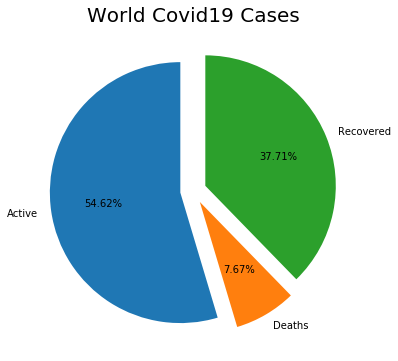

In [15]:
x = cvd.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].max()
x['Active'] = x['Confirmed'] - (x['Deaths']+x['Recovered'])
active = x['Active'].sum()
death = x['Deaths'].sum()
rec = x['Recovered'].sum()
z = {
    'Active': active,
    'Deaths': death,
    'Recovered': rec
}
ser = pd.Series(z)
ser.name = ''
ser.plot(kind = 'pie', autopct = '%1.2f%%', explode = (0.1,0.1,0.1), figsize = (15,6), startangle = 90)
plt.title('World Covid19 Cases', fontsize = 20)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


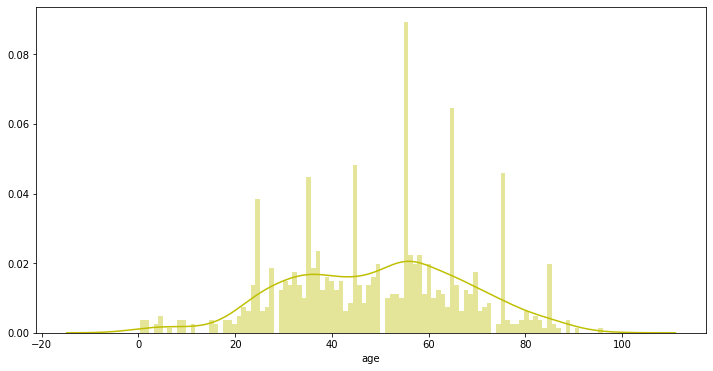

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(lld['age'],bins=100,color="y")

In [17]:
oll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
wuhan(0)_not_wuhan(1)       13170 non-null float64
latitude                    13147 non-null float64
longitude                   13147 non-null float64
geo_resolution              13147 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
lives_in_Wuhan              565 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
addi

In [18]:
oll

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


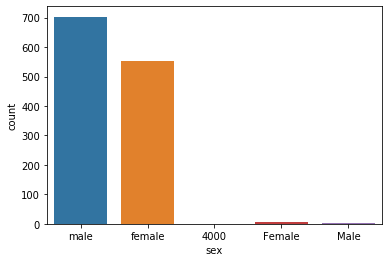

In [19]:
oll.dropna(subset = ["sex"], inplace=True)
sns.countplot(oll['sex'])

In [20]:
cnf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,5,6
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [21]:
cnf.drop('Province/State',inplace=True,axis=1)

In [22]:
cnf

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,France,46.885200,-56.315900,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,5,6
261,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [23]:
cnf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 99 columns):
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2/11/20           264 non-null int64
2/

In [24]:
col = []
for i in cnf.columns:
    if i!='Country/Region' and i!='Lat' and i!='Long':
        col.append(i)

In [25]:
jan=0
feb=0
mar=0
apr=0
for i in col:
    if i[0:1]=='1':
        jan+=1
    elif i[0:1]=='2':
        feb+=1
    elif i[0:1]=='3':
        mar+=1
    else:
        apr+=1

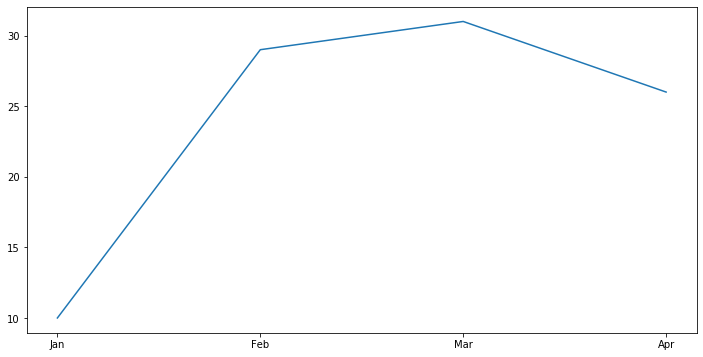

In [26]:
plt.figure(figsize=(12,6))
x=['Jan','Feb','Mar','Apr']
y=[jan,feb,mar,apr]
plt.plot(x,y)

In [27]:
cnfus.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20',
       '4/23/20', '4/24/20', '4/25/20', '4/26/20'],
      dtype='object', length=107)

In [28]:
cnfus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Columns: 107 entries, UID to 4/26/20
dtypes: float64(4), int64(97), object(6)
memory usage: 2.7+ MB


In [29]:
cnfus

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,136,136,136,136,136,136,139,141,141,141
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,13,14,14,14,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,51,53,53,53,53,54,54,54,55,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,84070017.0,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,6,7,7,7,7,8,11,12
3258,84070018.0,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,0,0,66,70,70,70,76,81,83,87
3259,84070019.0,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,10,10,10,9,9,9,9,10
3260,84070020.0,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,...,0,0,119,124,126,130,136,140,143,145


In [30]:
cnfus1=cnfus.groupby('Province_State').sum()
cnfus1.reset_index(inplace=True)

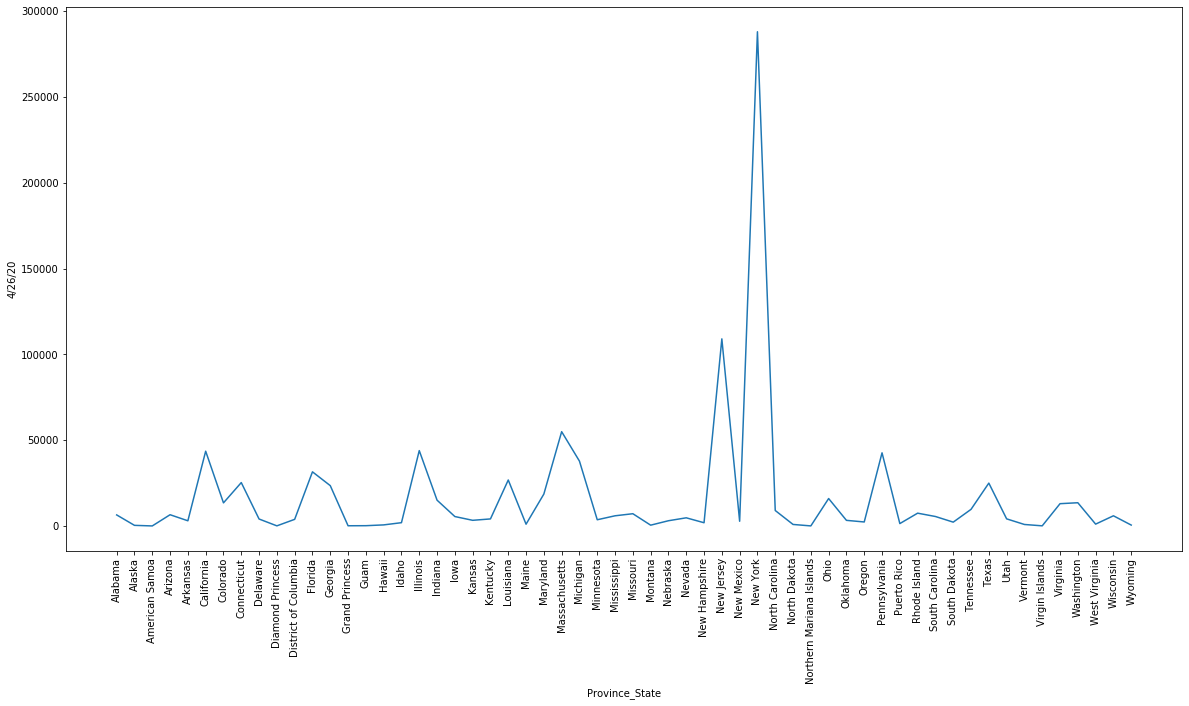

In [31]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.lineplot(x='Province_State',y='4/26/20',data=cnfus1)

In [32]:
dth

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,30,30,33,36,36,40,42,43,47,50
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,26,26,26,26,26,27,27,27,27,28
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,364,367,375,384,392,402,407,415,419,425
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,35,35,36,37,37,37,37,40,40,40
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dth.drop('Province/State',axis=1,inplace=True)

In [34]:
dth1= dth.groupby('Country/Region').sum()

In [35]:
dth1.reset_index(inplace=True)

In [36]:
dth1=dth1[dth1['4/26/20']>100]
dth1

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,364,367,375,384,392,402,407,415,419,425
6,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,...,123,129,132,136,147,152,165,176,185,192
9,Austria,47.5162,14.5501,0,0,0,0,0,0,0,...,431,443,452,470,491,510,522,530,536,542
13,Bangladesh,23.6850,90.3563,0,0,0,0,0,0,0,...,75,84,91,101,110,120,127,131,140,145
16,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,5163,5453,5683,5828,5998,6262,6490,6679,6917,7094
23,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,0,...,2141,2354,2462,2587,2741,2906,3331,3704,4057,4286
32,Canada,671.7607,-1237.6289,0,0,0,0,0,0,0,...,1354,1399,1563,1725,1908,2075,2240,2384,2547,2661
35,Chile,-35.6751,-71.5430,0,0,0,0,0,0,0,...,116,126,133,139,147,160,168,174,181,189
36,China,1083.3367,3684.4197,17,18,26,42,56,82,131,...,4636,4636,4636,4636,4636,4636,4636,4636,4636,4637
37,Colombia,4.5709,-74.2973,0,0,0,0,0,0,0,...,153,153,179,189,196,206,215,225,233,244


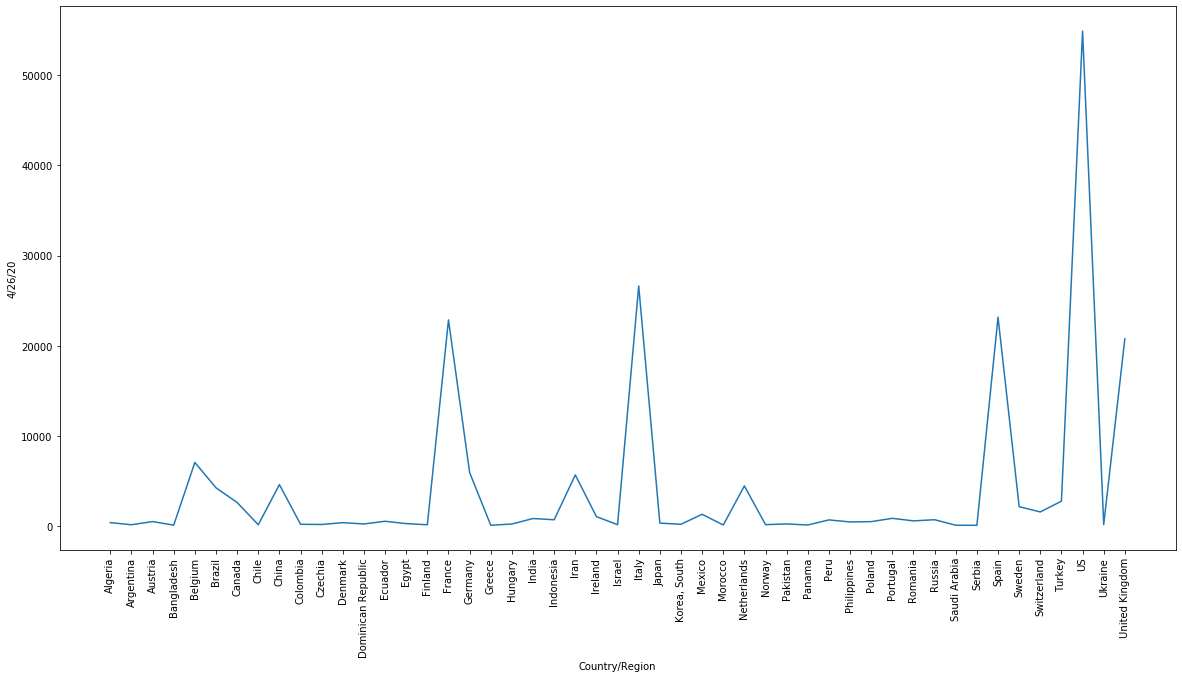

In [37]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.lineplot(x='Country/Region',y='4/26/20',data=dth1)

In [38]:
dthus1= dthus.groupby('Province_State').max()
dthus1.reset_index(inplace=True)

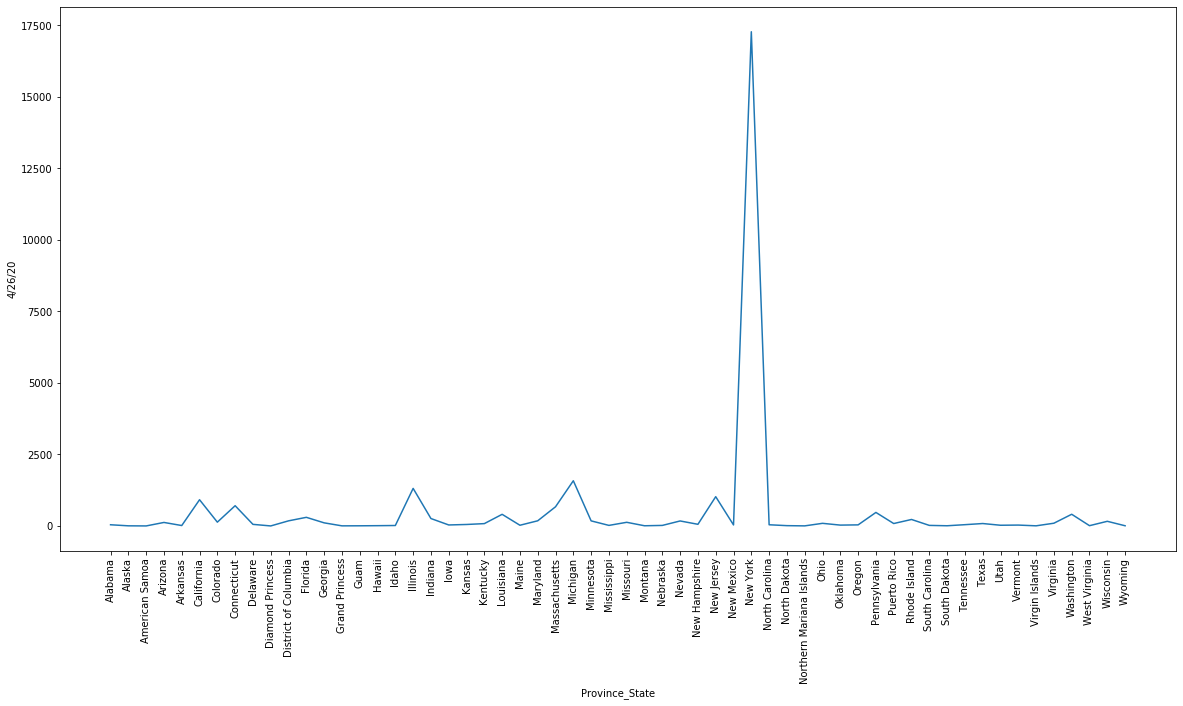

In [39]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.lineplot(x='Province_State',y='4/26/20',data=dthus1)

In [45]:
rec

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,99,112,131,135,150,166,179,188,188,207
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,283,302,314,327,345,356,385,394,403,410
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,846,894,1047,1099,1152,1204,1355,1408,1479,1508
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,191,205,235,248,282,309,333,344,344,344
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,5,5,5,5
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
rec1= rec.groupby('Country/Region').sum()
rec1.reset_index(inplace=True)
rec1

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,99,112,131,135,150,166,179,188,188,207
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,283,302,314,327,345,356,385,394,403,410
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,846,894,1047,1099,1152,1204,1355,1408,1479,1508
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,191,205,235,248,282,309,333,344,344,344
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,69,69,71,71,71,71,92,92,92,83
181,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,5,5,5
182,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
183,Zambia,-15.416700,28.283300,0,0,0,0,0,0,0,...,30,33,33,35,35,35,37,37,37,42


In [47]:
dates=[]
cols=[]
for i in rec1.columns:
    if i!='Country/Region' and i!='Lat' and i!='Long':
        dates.append(rec1[i].sum())
        cols.append(i)

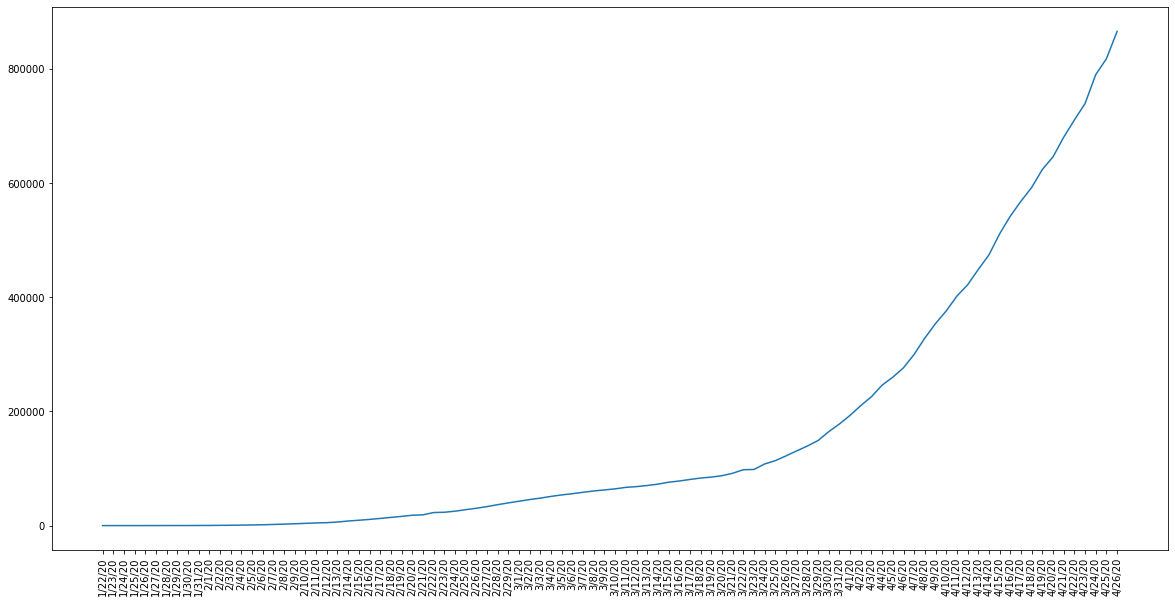

In [52]:
x=cols
y=dates
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(cols,dates)

In [77]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [78]:
init_notebook_mode(connected=True)

In [79]:
cf.go_offline()

In [69]:
cvd

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18960,18961,04/26/2020,Wyoming,US,2020-04-27 02:31:20,502.0,7.0,0.0
18961,18962,04/26/2020,Xinjiang,Mainland China,2020-04-27 02:31:20,76.0,3.0,73.0
18962,18963,04/26/2020,Yukon,Canada,2020-04-27 02:31:20,11.0,0.0,0.0
18963,18964,04/26/2020,Yunnan,Mainland China,2020-04-27 02:31:20,185.0,2.0,181.0


In [113]:
df= cvd[cvd['ObservationDate']=='04/26/2020']
df = df.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum()
df.reset_index(inplace=True)
df

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,1531.0,50.0,207.0
1,Albania,726.0,28.0,410.0
2,Algeria,3382.0,425.0,1508.0
3,Andorra,738.0,40.0,344.0
4,Angola,26.0,2.0,6.0
...,...,...,...,...
182,West Bank and Gaza,342.0,2.0,83.0
183,Western Sahara,6.0,0.0,5.0
184,Yemen,1.0,0.0,1.0
185,Zambia,88.0,3.0,42.0


In [114]:
df= df[df['Confirmed']>1000]

In [115]:
df

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,1531.0,50.0,207.0
2,Algeria,3382.0,425.0,1508.0
6,Argentina,3892.0,192.0,1107.0
7,Armenia,1746.0,28.0,833.0
8,Australia,6714.0,83.0,5541.0
...,...,...,...,...
173,UK,154037.0,20794.0,778.0
174,US,965783.0,54881.0,106988.0
176,Ukraine,8617.0,209.0,840.0
177,United Arab Emirates,10349.0,76.0,1978.0


In [81]:
df.iplot(kind='bar',x='Country/Region',y='Confirmed')

In [82]:
df.iplot(kind='scatter',x='Country/Region',y='Deaths')

In [88]:
df.iplot(kind='bar',x='Country/Region',y='Recovered')

In [116]:
import plotly.graph_objs as go
df= cvd[cvd['ObservationDate']=='04/26/2020']
df = df.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum()
df.reset_index(inplace=True)
df=df[df['Confirmed']>0]

In [134]:
data= go.Choropleth(locations=df['Country/Region'],
           locationmode = 'country names',
           z=df['Confirmed'],
           colorscale='reds',
           marker_line_color='black'
          )

In [138]:
layout = dict(
    title = 'COVID cases',
    geo = dict(
        showframe = False,
        projection = {'type':'equirectangular'}
    )
)

In [139]:
choromap= go.Figure(data=[data],layout=layout)

In [140]:
iplot(choromap)

In [142]:
cvd

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18960,18961,04/26/2020,Wyoming,US,2020-04-27 02:31:20,502.0,7.0,0.0
18961,18962,04/26/2020,Xinjiang,Mainland China,2020-04-27 02:31:20,76.0,3.0,73.0
18962,18963,04/26/2020,Yukon,Canada,2020-04-27 02:31:20,11.0,0.0,0.0
18963,18964,04/26/2020,Yunnan,Mainland China,2020-04-27 02:31:20,185.0,2.0,181.0


In [143]:
df1=cvd.groupby(['ObservationDate','Country/Region']).sum()
df1.reset_index(inplace=True)
df1

,ObservationDate,Country/Region,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Japan,36,2.0,0.0,0.0
2,01/22/2020,Macau,21,1.0,0.0,0.0
3,01/22/2020,Mainland China,535,547.0,17.0,28.0
4,01/22/2020,South Korea,38,1.0,0.0,0.0
...,...,...,...,...,...,...
10348,04/26/2020,West Bank and Gaza,18823,342.0,2.0,83.0
10349,04/26/2020,Western Sahara,18824,6.0,0.0,5.0
10350,04/26/2020,Yemen,18825,1.0,0.0,1.0
10351,04/26/2020,Zambia,18826,88.0,3.0,42.0


In [144]:
import plotly.express as px

In [145]:
fig= px.choropleth(df1,locations='Country/Region',locationmode='country names',color='Confirmed',hover_name='Country/Region',animation_frame='ObservationDate',title='COVID cases')
fig.update_layout(title_text = 'COVID Spread Datewise',geo=dict(showframe = False))
fig.show()